In [535]:
from data_pipeline import *
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from clustering import *
import seaborn as sns
import scipy.stats as stats

In [536]:
root_gene = 'CRP'
minimum_evidence = 'weak'
max_depth = np.inf
r_expr, gene_symbols, sample_names = load_data(root_gene=root_gene,
                                     minimum_evidence=minimum_evidence,
                                     max_depth=max_depth)

synthetic_name = 'EColi_n{}_r{}_e{}_d{}'.format(len(gene_symbols), root_gene, minimum_evidence, max_depth)
s_expr, s_gs = load_synthetic(synthetic_name)

assert (np.array(gene_symbols) == np.array(s_gs)).all()

# Split data into train and test sets
train_idxs, test_idxs = split_train_test(sample_names)
expr_train = r_expr[train_idxs, :]
expr_test = r_expr[test_idxs, :]

Found 4297 genes in datafile
Found 1208 genes in CRP regulatory network
4297 genes not in gene subset. Selecting 1076 genes ...


# Intensity histograms

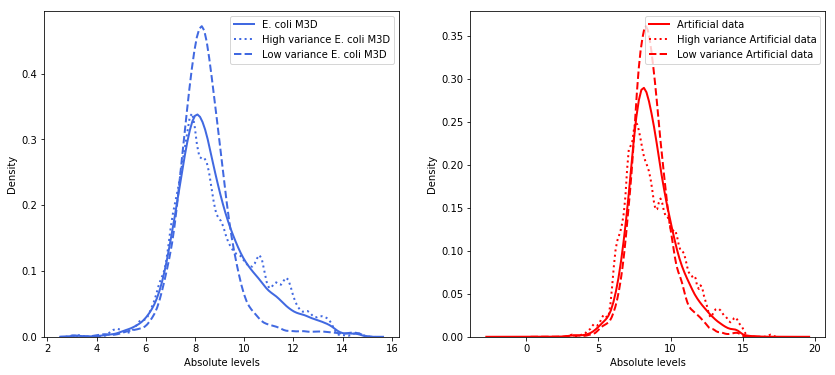

In [537]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_intensities(expr_train)
plt.subplot(122)
plot_intensities(s_expr, dataset_name='Artificial data', color='red');

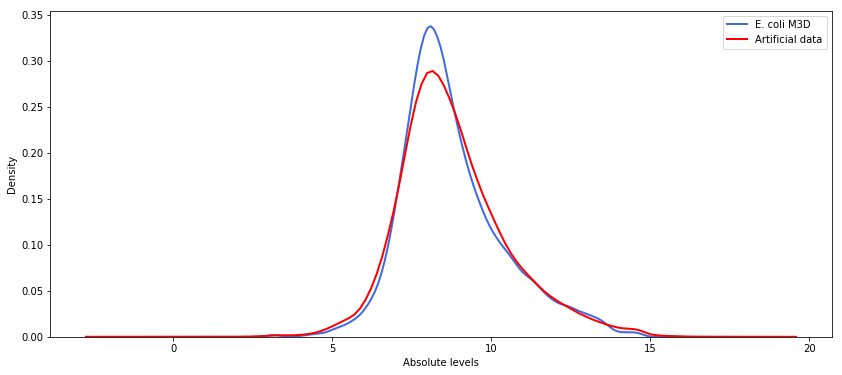

In [538]:
plt.figure(figsize=(14, 6))
ax = plot_intensities(expr_train, plot_quantiles=False)
plot_intensities(s_expr, dataset_name='Artificial data', color='red', plot_quantiles=False, ax=ax);

# Gene ranges histograms

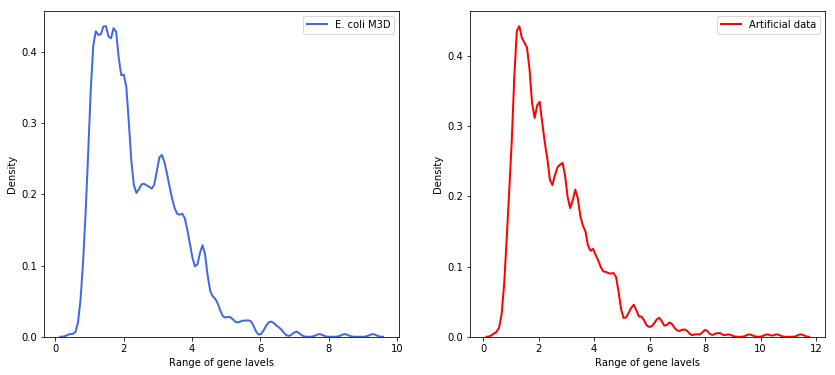

In [523]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_gene_ranges(expr_train)
plt.subplot(122)
plot_gene_ranges(s_expr, dataset_name='Artificial data', color='red');

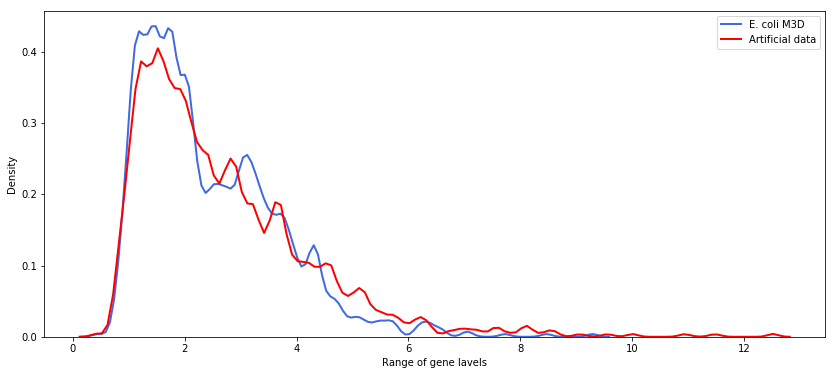

In [539]:
plt.figure(figsize=(14, 6))
# plt.subplot(121)
ax = plot_gene_ranges(expr_train)
# plt.subplot(122)
plot_gene_ranges(s_expr, dataset_name='Artificial data', color='red', ax=ax);

# TF-TG histogram (using synthetic background distribution)

In [532]:
r_tf_tg_corr, r_tg_tg_corr = compute_tf_tg_corrs(expr_train, gene_symbols)
s_tf_tg_corr, s_tg_tg_corr = compute_tf_tg_corrs(s_expr, gene_symbols)
r_back_corr = correlations_list(expr_train, expr_train)
s_back_corr = correlations_list(s_expr, s_expr)

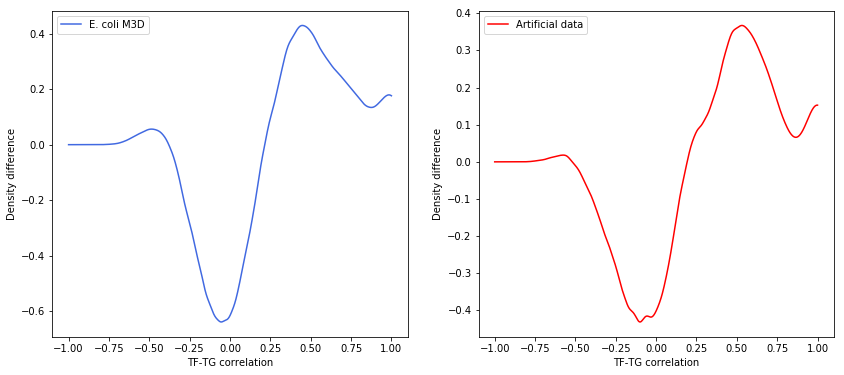

In [416]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_difference_histogram(r_tf_tg_corr, r_back_corr, 'TF-TG correlation')
plt.subplot(122)
plot_difference_histogram(s_tf_tg_corr, s_back_corr, 'TF-TG correlation', dataset_name='Artificial data', color='red');

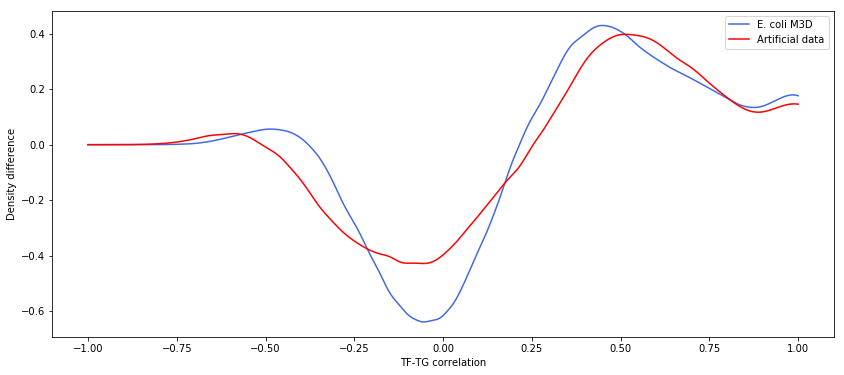

In [483]:
plt.figure(figsize=(14, 6))
ax = plot_difference_histogram(r_tf_tg_corr, r_back_corr, 'TF-TG correlation')
plot_difference_histogram(s_tf_tg_corr, s_back_corr, 'TF-TG correlation', dataset_name='Artificial data', color='red', ax=ax); 

# TF-TG histogram (using real background distribution)

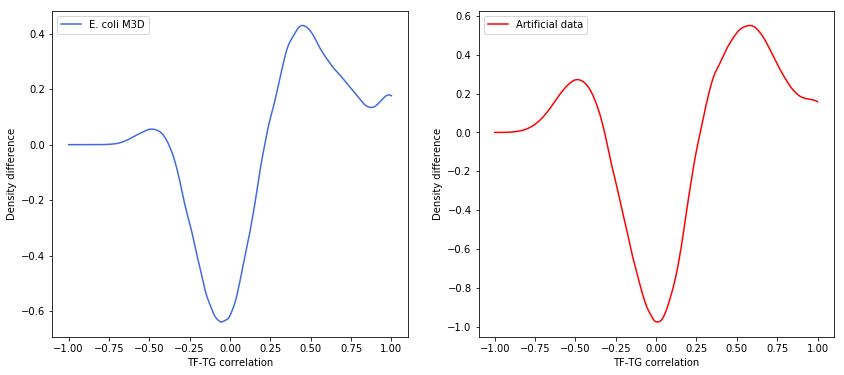

In [378]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_difference_histogram(r_tf_tg_corr, r_back_corr, 'TF-TG correlation')
plt.subplot(122)
plot_difference_histogram(s_tf_tg_corr, r_back_corr, 'TF-TG correlation', dataset_name='Artificial data', color='red');

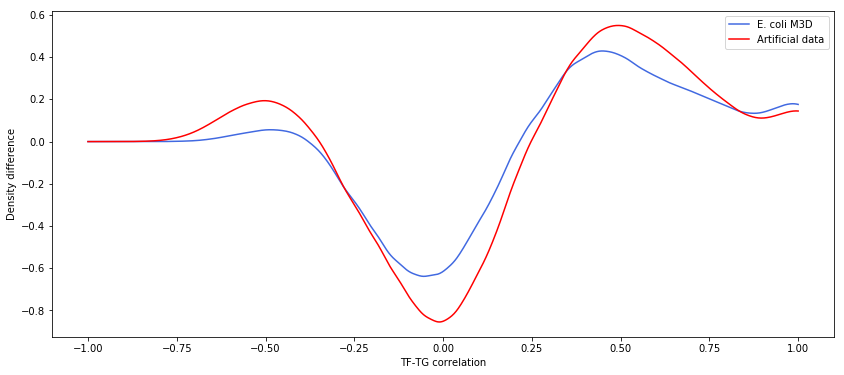

In [484]:
# plt.figure(figsize=(7, 7))
plt.figure(figsize=(14, 6))
ax = plot_difference_histogram(r_tf_tg_corr, r_back_corr, 'TF-TG correlation')
plot_difference_histogram(s_tf_tg_corr, r_back_corr, 'TF-TG correlation', dataset_name='Artificial data', color='red', ax=ax);  # Try s_back_corr

# TG-TG histogram (using synthetic background distribution)

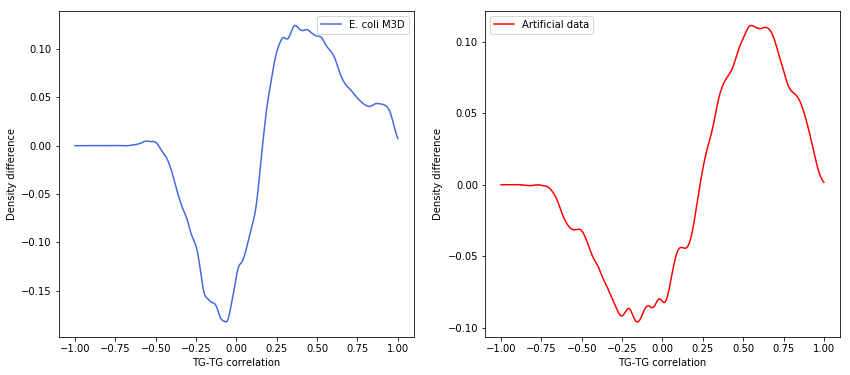

In [380]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_difference_histogram(r_tg_tg_corr, r_back_corr, 'TG-TG correlation')
plt.subplot(122)
plot_difference_histogram(s_tg_tg_corr, s_back_corr, 'TG-TG correlation', dataset_name='Artificial data', color='red');

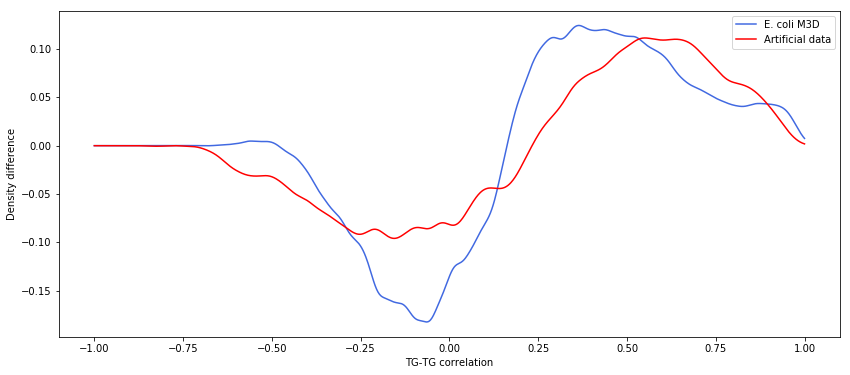

In [381]:
# plt.figure(figsize=(7, 7))
plt.figure(figsize=(14, 6))
ax = plot_difference_histogram(r_tg_tg_corr, r_back_corr, 'TG-TG correlation')
plot_difference_histogram(s_tg_tg_corr, s_back_corr, 'TG-TG correlation', dataset_name='Artificial data', color='red', ax=ax);

# TG-TG histogram (using real background distribution)

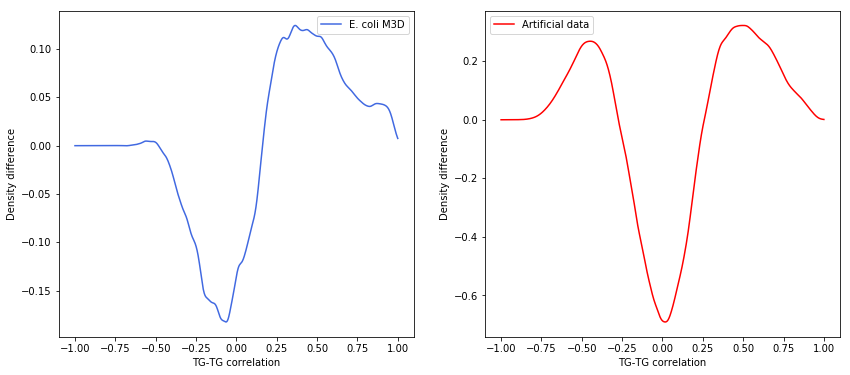

In [382]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_difference_histogram(r_tg_tg_corr, r_back_corr, 'TG-TG correlation')
plt.subplot(122)
plot_difference_histogram(s_tg_tg_corr, r_back_corr, 'TG-TG correlation', dataset_name='Artificial data', color='red');

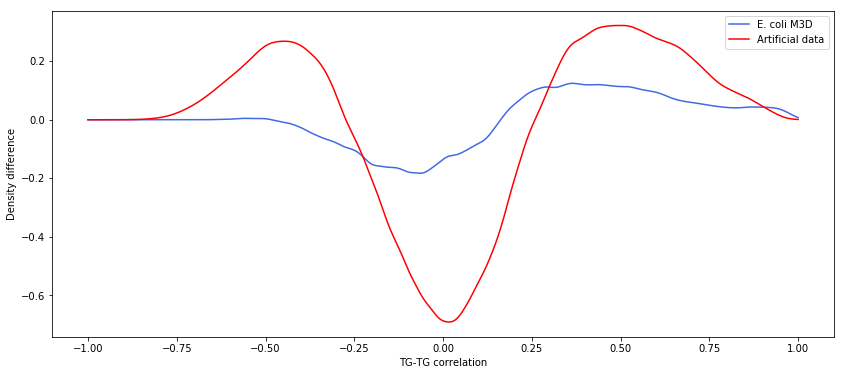

In [383]:
# plt.figure(figsize=(7, 7))
plt.figure(figsize=(14, 6))
ax = plot_difference_histogram(r_tg_tg_corr, r_back_corr, 'TG-TG correlation')
plot_difference_histogram(s_tg_tg_corr, r_back_corr, 'TG-TG correlation', dataset_name='Artificial data', color='red', ax=ax);

# Compare background distributions

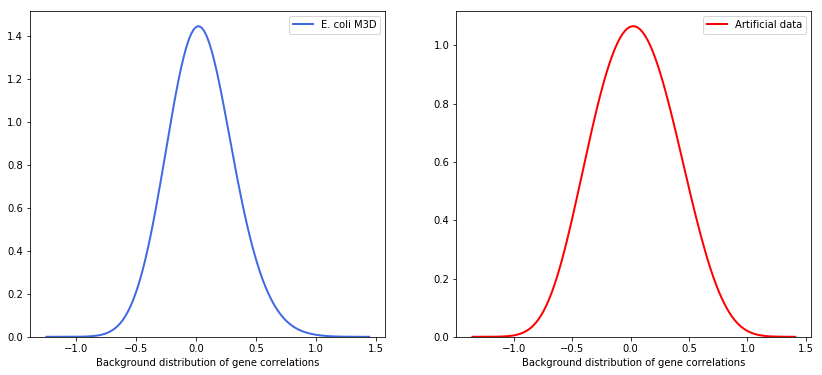

In [384]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_distribution(r_back_corr, xlabel='Background distribution of gene correlations')
plt.subplot(122)
plot_distribution(s_back_corr, xlabel='Background distribution of gene correlations', label='Artificial data', color='red');

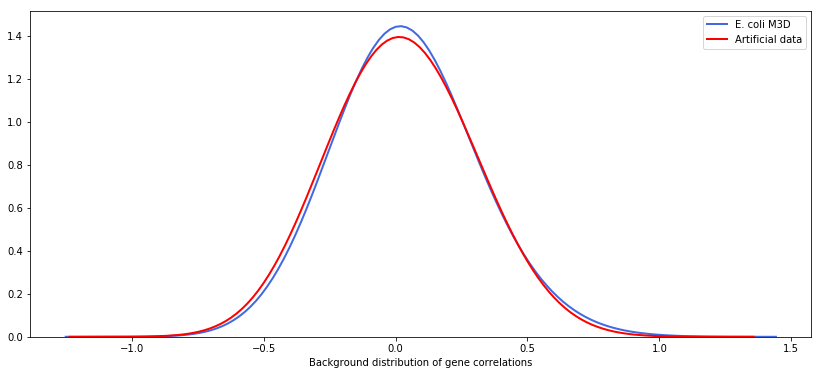

In [533]:
plt.figure(figsize=(14, 6))
ax = plot_distribution(r_back_corr, xlabel='Background distribution of gene correlations')
plot_distribution(s_back_corr, xlabel='Background distribution of gene correlations', label='Artificial data', color='red');

# TF activity histogram

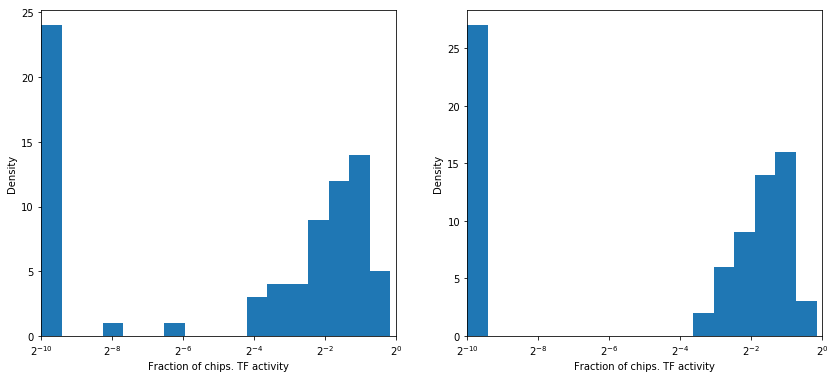

In [386]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_tf_activity_histogram(expr_train, gene_symbols)
plt.subplot(122)
plot_tf_activity_histogram(s_expr, gene_symbols)

# Cophenetic coefficients

In [534]:
gamma_dx_dz, gamma_dx_tx, gamma_dz_tz, gamma_tx_tz = gamma_coefficients(expr_train, s_expr)
print('Gamma(D^X, D^Z): {}'.format(gamma_dx_dz))
print('Gamma(D^X, T^X): {}'.format(gamma_dx_tx))
print('Gamma(D^Z, T^Z): {}'.format(gamma_dz_tz))
print('Gamma(T^X, T^Z): {}'.format(gamma_tx_tz))

r_tf_tg_corr_flat, r_tg_tg_corr_flat = compute_tf_tg_corrs(expr_train, gene_symbols, flat=False)
s_tf_tg_corr_flat, s_tg_tg_corr_flat = compute_tf_tg_corrs(s_expr, gene_symbols, flat=False)
psi_dx_dz = psi_coefficient(r_tf_tg_corr_flat, s_tf_tg_corr_flat)
theta_dx_dz = theta_coefficient(r_tg_tg_corr_flat, s_tg_tg_corr_flat)
print('Psi(D^X, D^Z): {}'.format(psi_dx_dz))
print('Theta(D^X, D^Z): {}'.format(theta_dx_dz))

Gamma(D^X, D^Z): 0.8164953475098724
Gamma(D^X, T^X): 0.5308278489633552
Gamma(D^Z, T^Z): 0.49064325970552203
Gamma(T^X, T^Z): 0.4148005377225431
Psi(D^X, D^Z): 0.8948682146449454
Theta(D^X, D^Z): 0.8436708870197165
